# Customer conversion prediction for insurance

#### Importing required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,roc_auc_score

d:\anaconda\envs\Beast_20220927\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\anaconda\envs\Beast_20220927\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\anaconda\envs\Beast_20220927\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


#### Reading dataset 

In [2]:
df = pd.read_csv('dataset.csv')
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


## Data cleaning

#### Finding number of unique values in each column

In [84]:
df.nunique(axis=0)

age                 77
job                 12
marital              3
education_qual       4
call_type            3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         4
y                    2
dtype: int64

#### Finding number of null values in each columns

In [85]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

#### Finding number of duplicate entries in dataset

In [86]:
df[df.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


#### Removing duplicate entries in dataset

In [87]:
df.drop_duplicates(inplace=True)

#### Viewing statistical description of data

In [88]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


## Exploratory Data Analysis

#### Analysing the target variable 

Text(0.5, 1.0, 'Target Variable')

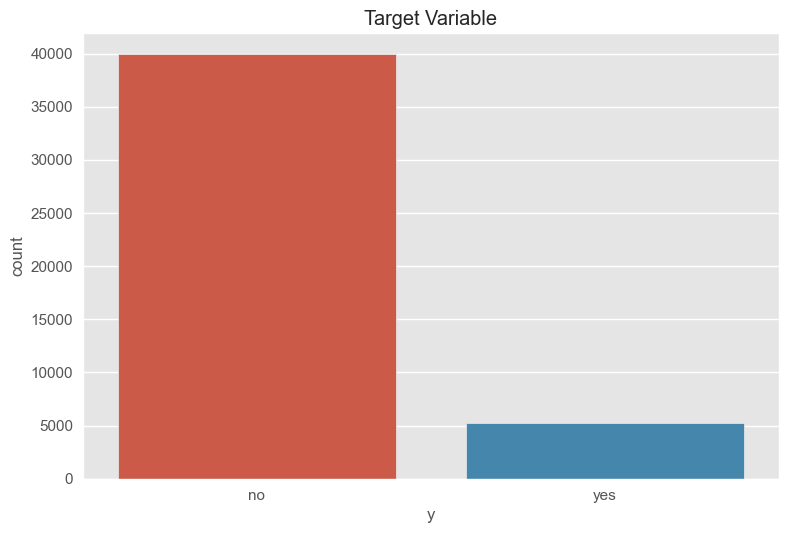

In [90]:
sns.countplot(x = 'y' ,data=df )
plt.title('Target Variable')

In [91]:
print("Percentage of Yes and No")
df["y"].value_counts()/len(df)*100

Percentage of Yes and No


no     88.299967
yes    11.700033
Name: y, dtype: float64

##### From the above plot and percentage of yes no we can say that this dataset is imbalanced and we need to balance this data before training the model

In [92]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


#### Univariate analysis of categorical columns

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')


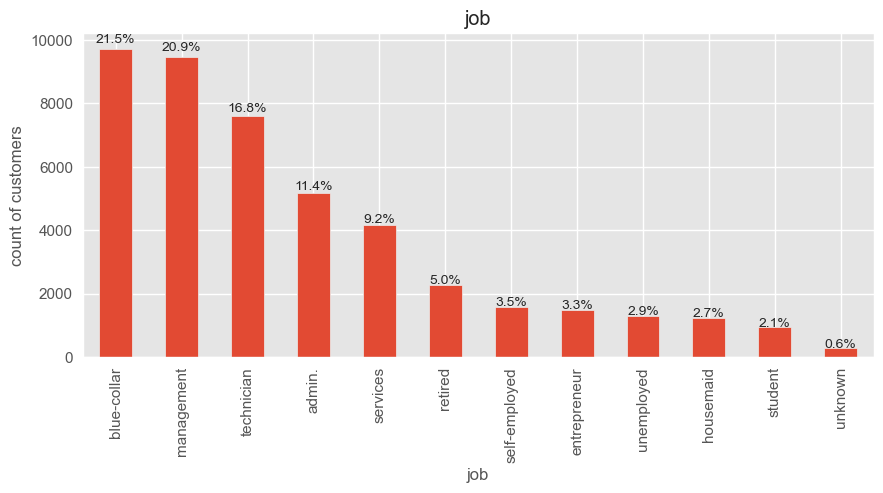

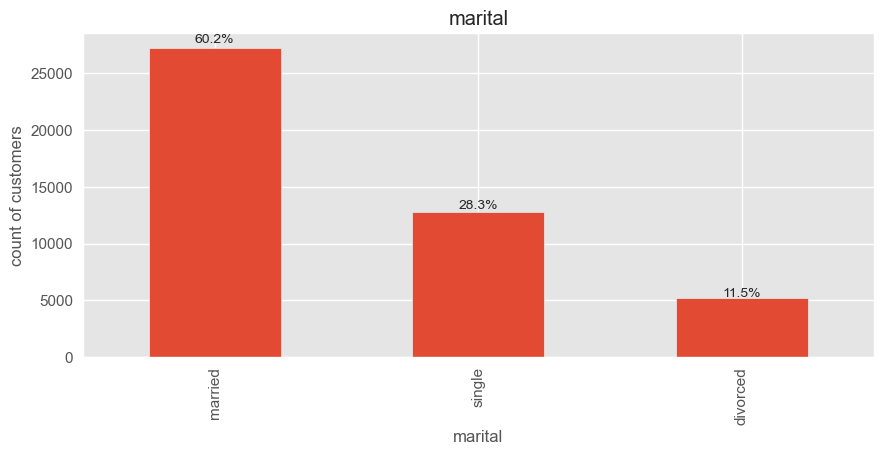

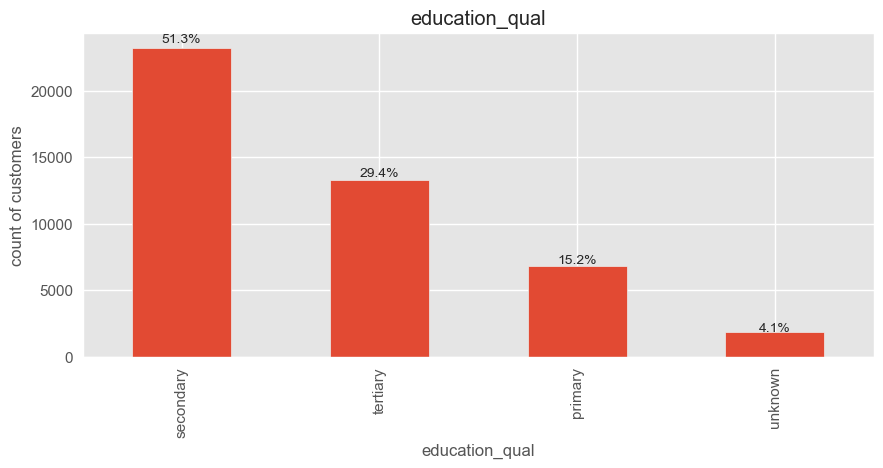

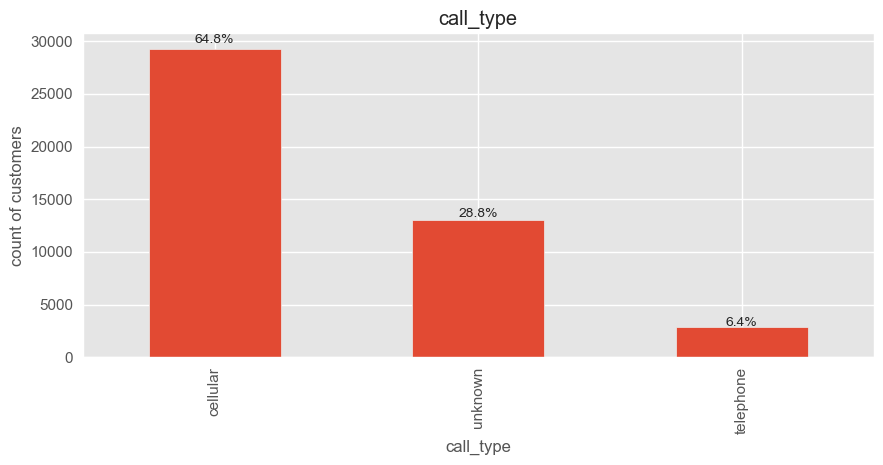

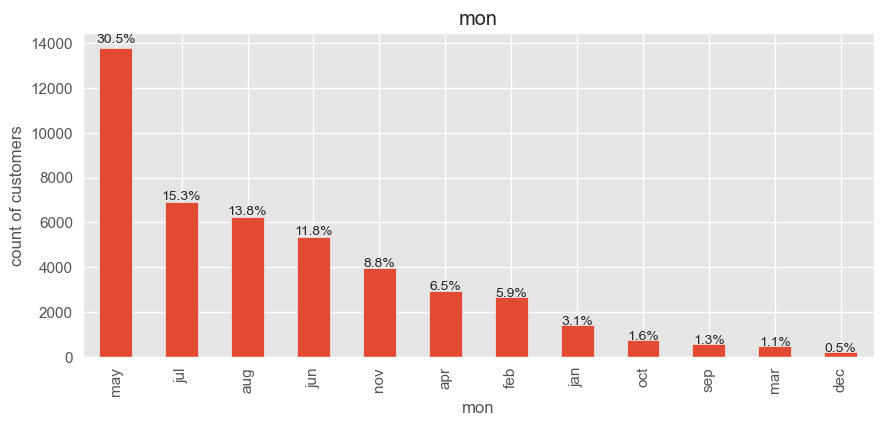

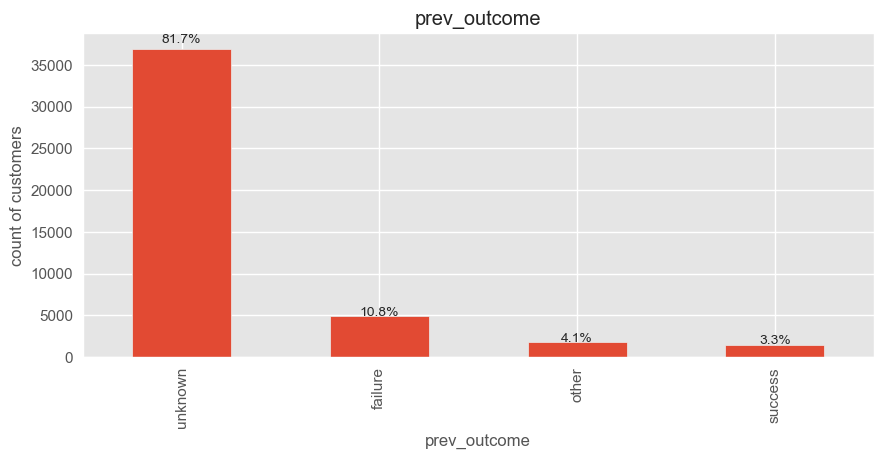

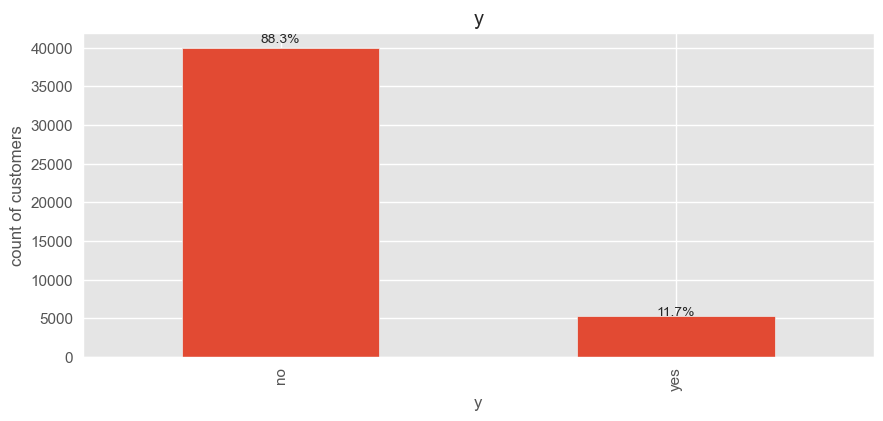

In [93]:

categorical_columns= df.select_dtypes(include= ["object"]).columns
print(categorical_columns)

for column in categorical_columns:
    plt.figure(figsize=(20,4))
    ax = plt.subplot(121)
    df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("count of customers")
    plt.title(column)
    
    # Add percentage labels to the top of each bar
    total = sum([p.get_height() for p in ax.patches])
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height/total:.1%}', (x + width/2, y + height*1.02), ha='center')
        
        

The top three profession in our datasets are blue-collar,management, technician.
<br/>

Most of them are married.
<br/>

Most customers belongs to secondary education qualification.
<br/>

Most customers use cellular type.
<br/>

In the month of may many of the customers have been contacted.
<br/>

There is heavy imbalance in the target variable







#### We need to impute the unknown value in job and education_qual column and we need to keep rest because of the percenatge of unknown is high in others.

In [94]:
impute=['job','education_qual']
for column in impute:
    mode= df[column].mode()[0]
    df[column]= df[column].replace("unknown", mode)

### **Univariate analysis of Numerical columns**

In [95]:
numerical_variable = df.select_dtypes(include=[np.number])

using seaborn

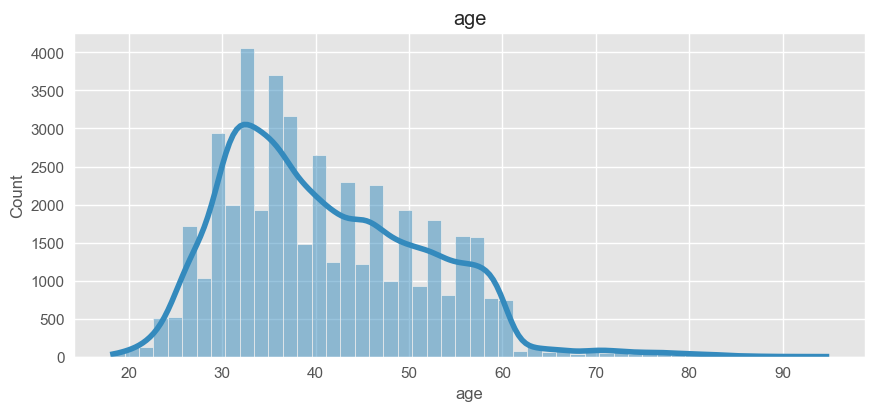

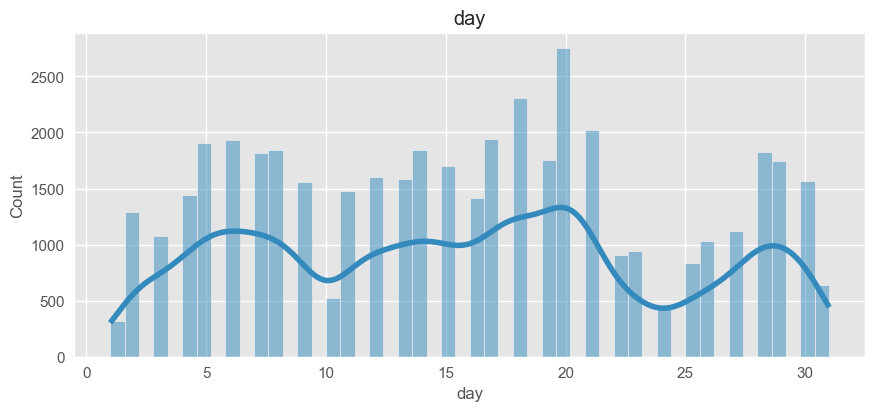

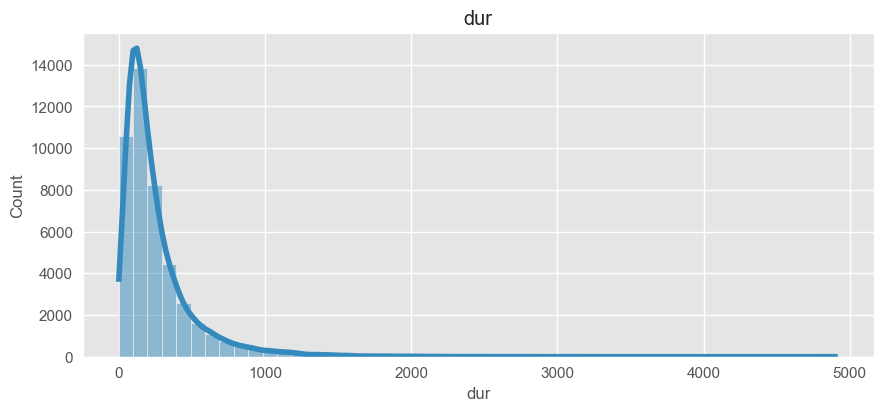

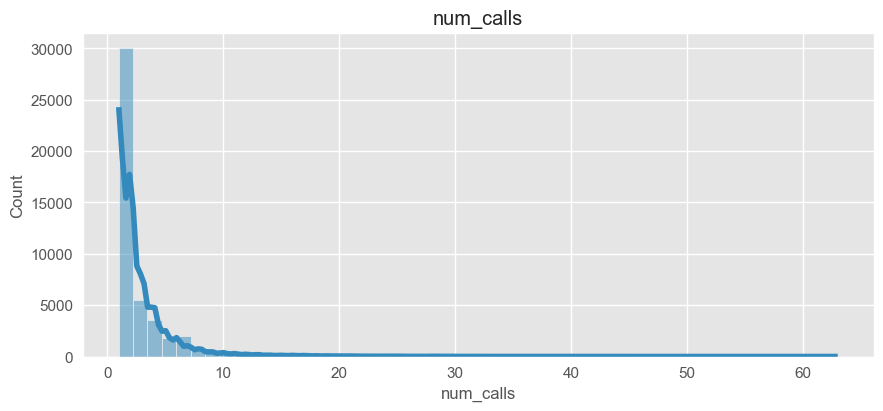

In [96]:
plt.style.use("ggplot")
for column in numerical_variable.columns:
    plt.figure(figsize=(20,4))
    ax = plt.subplot(121)
    sns.histplot(data=df, x=column,kde=True,bins=50)
    plt.title(column)

using pandas

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'dur'}>,
        <AxesSubplot:title={'center':'num_calls'}>]], dtype=object)

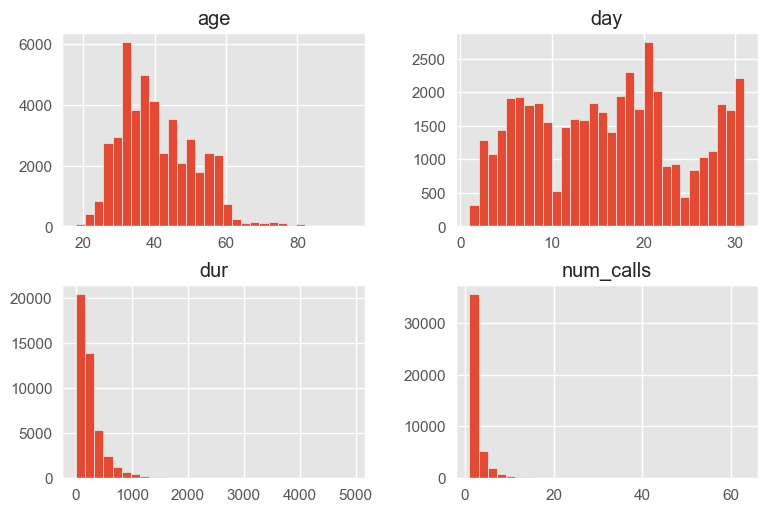

In [97]:
df.hist(bins=30)

#### **Boxplot and outlier analysis**

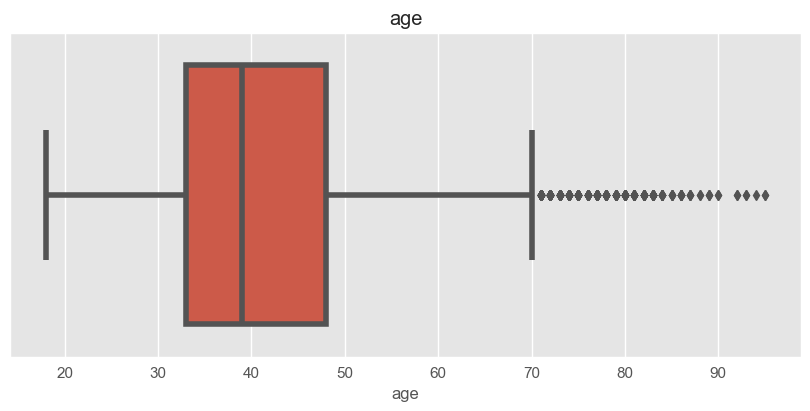

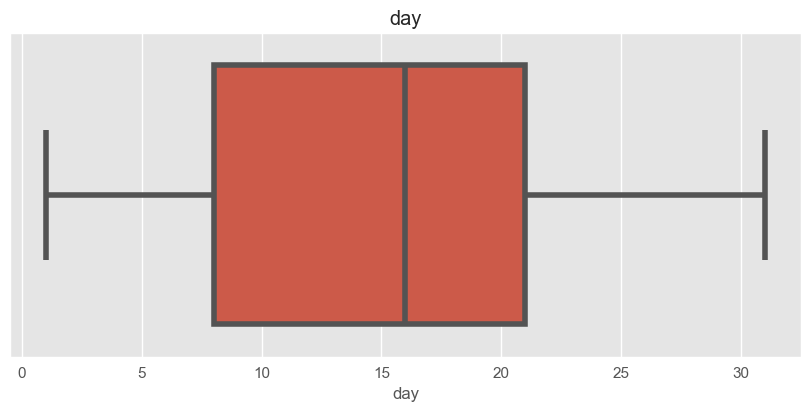

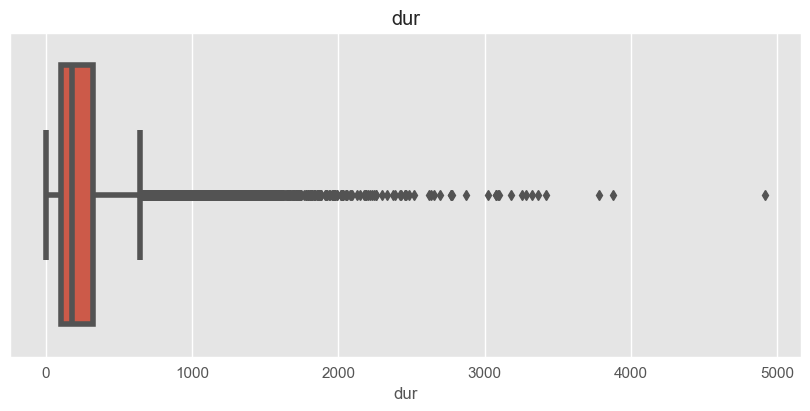

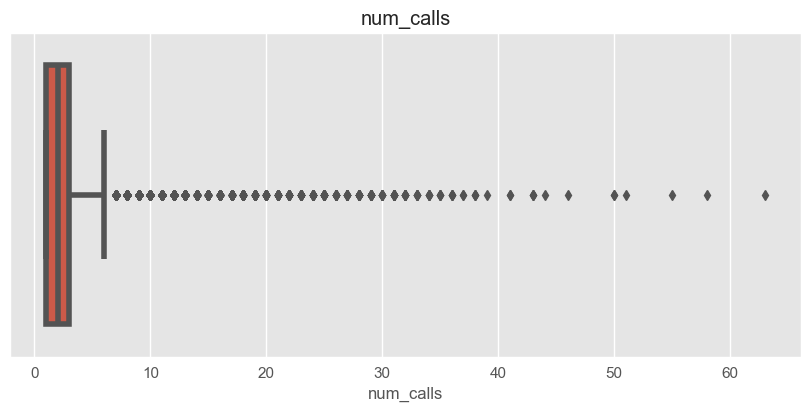

In [98]:
plt.style.use("ggplot")
for column in numerical_variable.columns:
    plt.figure(figsize=(20,4))
    ax = plt.subplot(121)
    sns.boxplot(data=df, x=column)
    plt.title(column)

We can see there is many outliers in the upper bound and in the lower bound there is no outliers

#### **Z-score analysis of outliers**

In [99]:
# Z score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['age']))
outlier = np.array(np.where(z > 3))
#a = pd.DataFrame(outlier)
print(outlier.size)

381


Since there is many outliers in the single age column itself its best to choose iqr to impute the outliers

#### **IQR outlier analysis**

In [100]:
lower= []
upper= []
for i in numerical_variable.columns:
    IQR= df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bound= df[i].quantile(0.25) - (1.5*IQR)
    upper_bound= df[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower.append(lower_bound)
    upper.append(upper_bound)

age : 10.5 , 70.5
day : -11.5 , 40.5
dur : -221.0 , 643.0
num_calls : -2.0 , 6.0


##### Imputing upper bound outliers

In [101]:
j = 0
for i in numerical_variable.columns:
    df.loc[df[i] > upper[j], i] = int(upper[j])
    j = j+1

Checking for outliers again

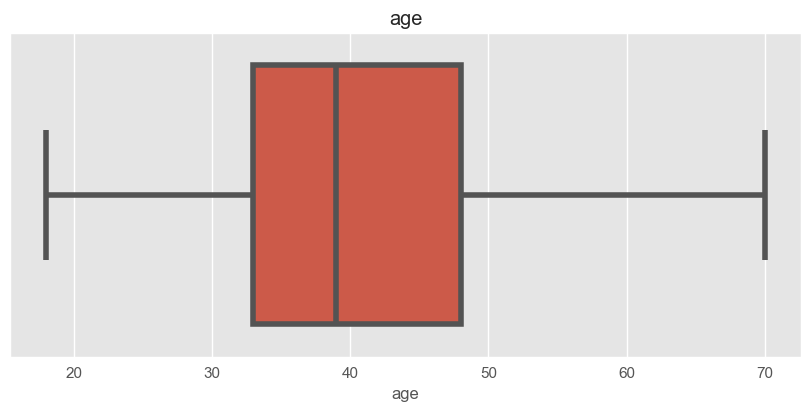

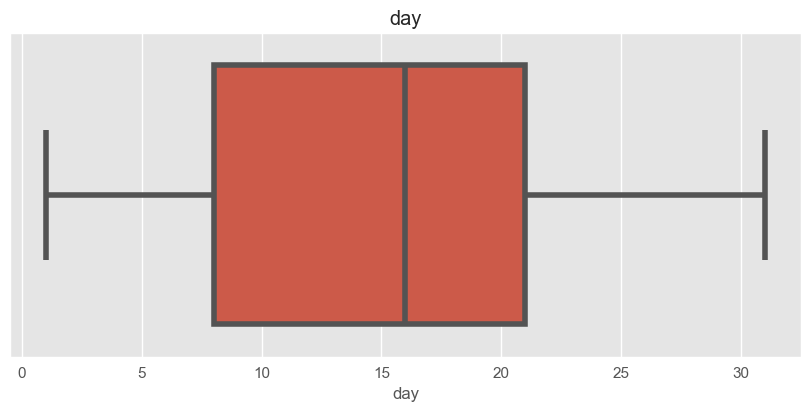

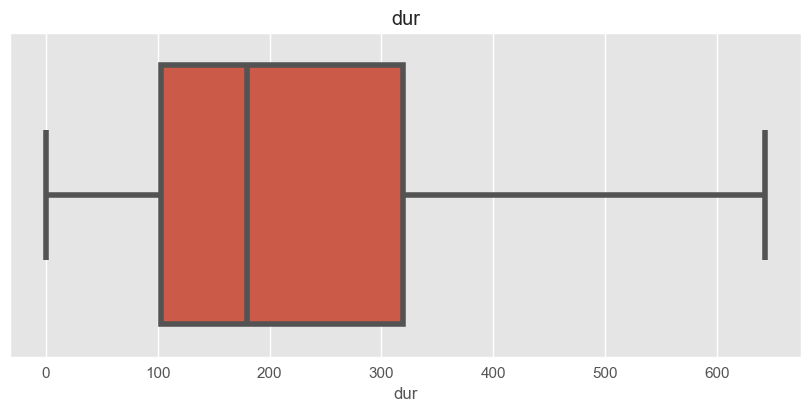

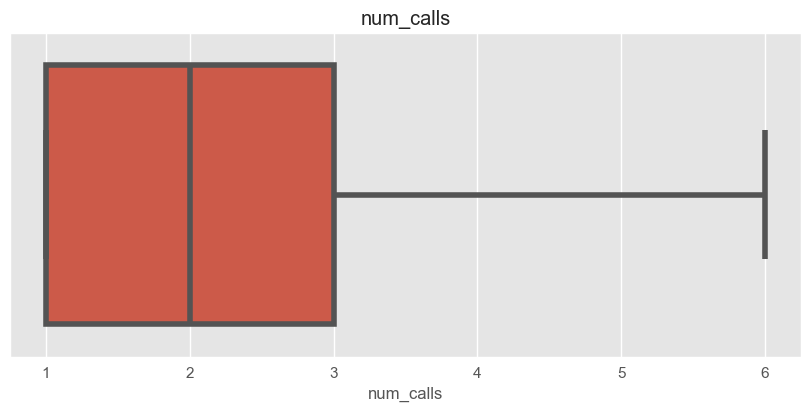

In [102]:
plt.style.use("ggplot")
for column in numerical_variable.columns:
    plt.figure(figsize=(20,4))
    ax = plt.subplot(121)
    sns.boxplot(data=df, x=column)
    plt.title(column)

Now you can see outliers is imputed and we can see the result in the box plot

In [103]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.863666,15.80688,234.95620,2.392235
std,10.380009,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,70.000000,31.00000,643.00000,6.000000


### **Bivariate analysis of Categorical columns vs Target variable**

In [105]:
df.replace({'y': {'yes':1,'no':0}},inplace=True)

In [ ]:
# #df.groupby('job')['y'].mean().sort_values(ascending=False).plot(kind='bar')
# categorical_columns= df.select_dtypes(include= ["object"]).columns
# for column in categorical_columns:
#     df.groupby(column)['y'].mean().sort_values(ascending=False).plot(kind='bar')
#     plt.show()

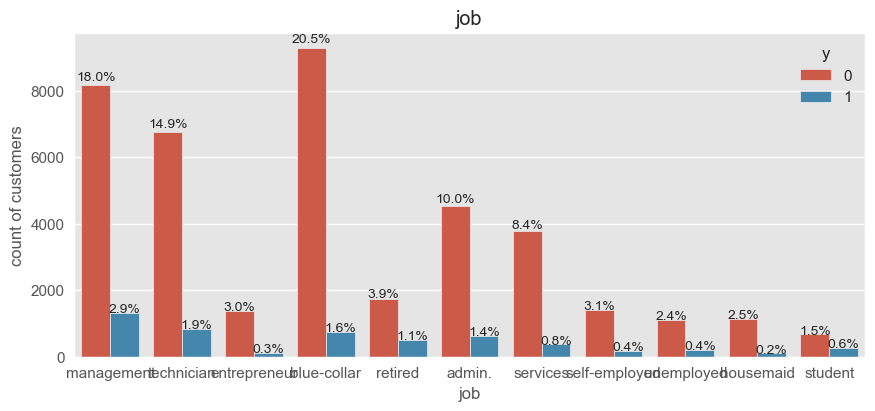

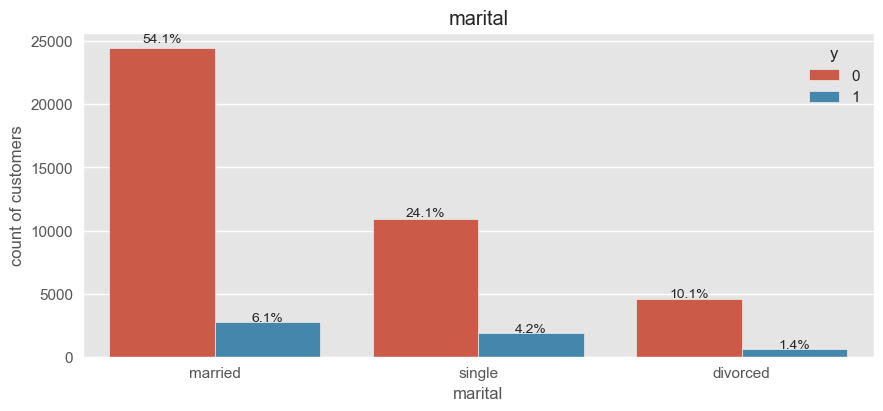

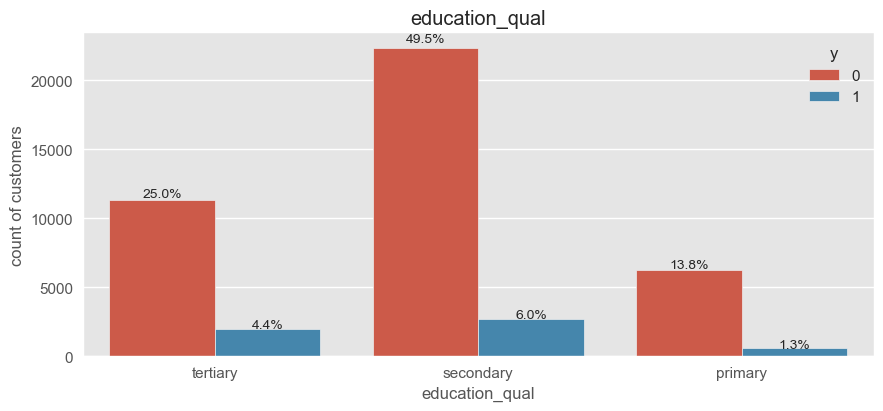

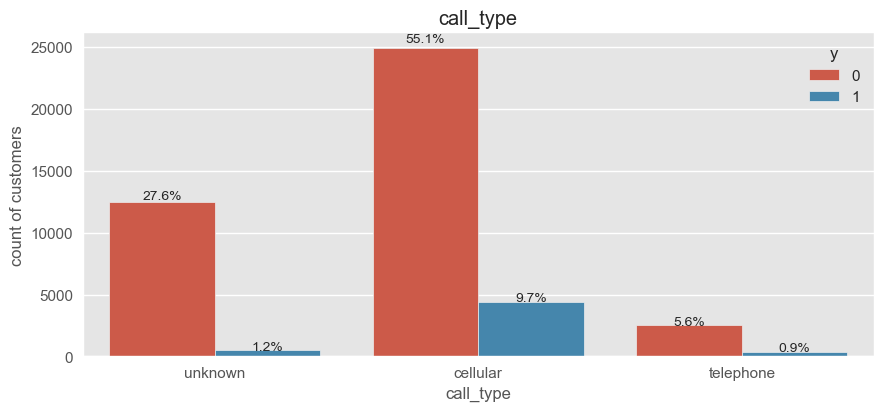

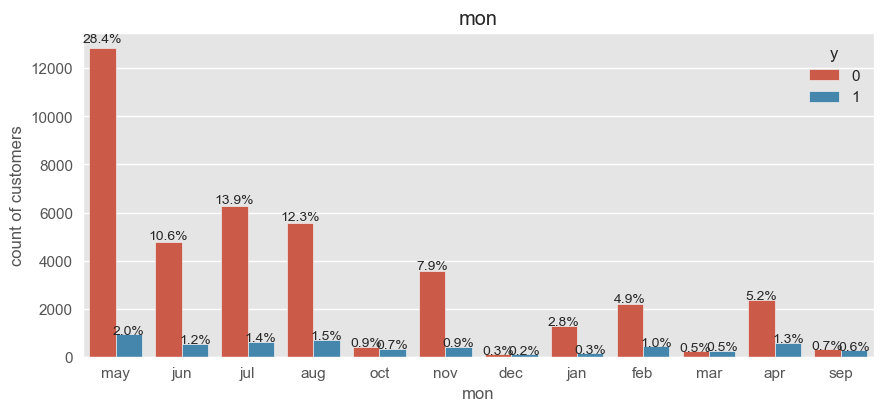

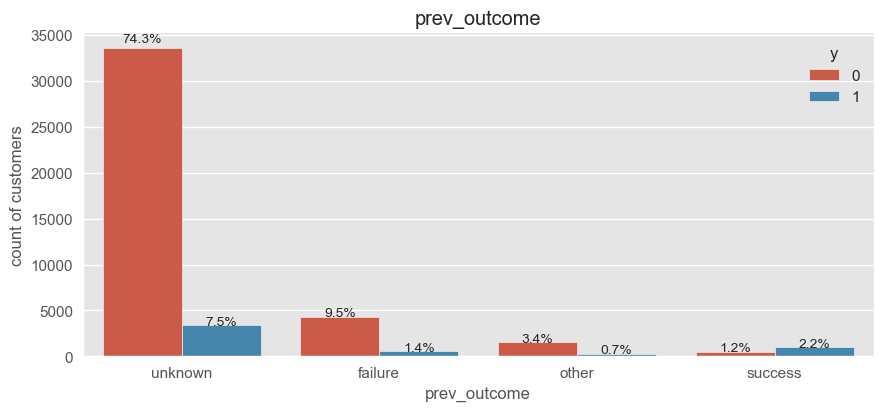

In [108]:
categorical_columns= df.select_dtypes(include= ["object"]).columns
for column in categorical_columns:
    plt.figure(figsize=(20,4))
    ax = plt.subplot(121)
    sns.countplot(data=df,x=column,hue='y')
    plt.xlabel(column)
    plt.ylabel("count of customers")
    plt.title(column)
    
    # Add percentage labels to the top of each bar
    total = sum([p.get_height() for p in ax.patches])
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height/total:.1%}', (x + width/2, y + height*1.02), ha='center')
    plt.show()

1.Managements professional are converted most in our dataset.
<br/>

2.Married person are most likely to be converted
<br/>

3.Qualifiation of converted most customer is secondary education
<br/>

4.cell-phone type is preferred mode od contact
<br/>

5.Most favourable month of conversion is may

### Correlation analysis of all columns

<AxesSubplot:>

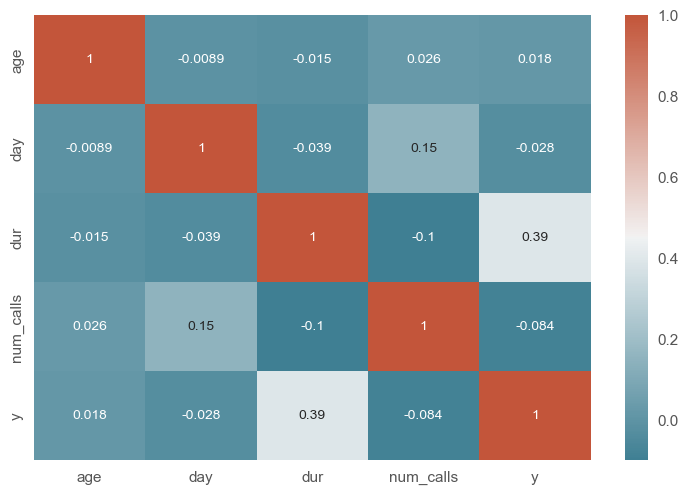

In [109]:
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

There is no features that are highly correlated.So we dont need to remove any columns

#### Visualization using external packages

Shape of your Data Set loaded: (45211, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
dur,1573,int64,0,0.000000,3.479242,0,
age,77,int64,0,0.000000,0.170313,0,
num_calls,48,int64,0,0.000000,0.106169,0,
day,31,int64,0,0.000000,0.068567,0,
job,12,object,0,0.000000,0.026542,288,
mon,12,object,0,0.000000,0.026542,214,
education_qual,4,object,0,0.000000,0.008847,1857,
prev_outcome,4,object,0,0.000000,0.008847,1511,
marital,3,object,0,0.000000,0.006636,5207,
call_type,3,object,0,0.000000,0.006636,2906,


    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 10


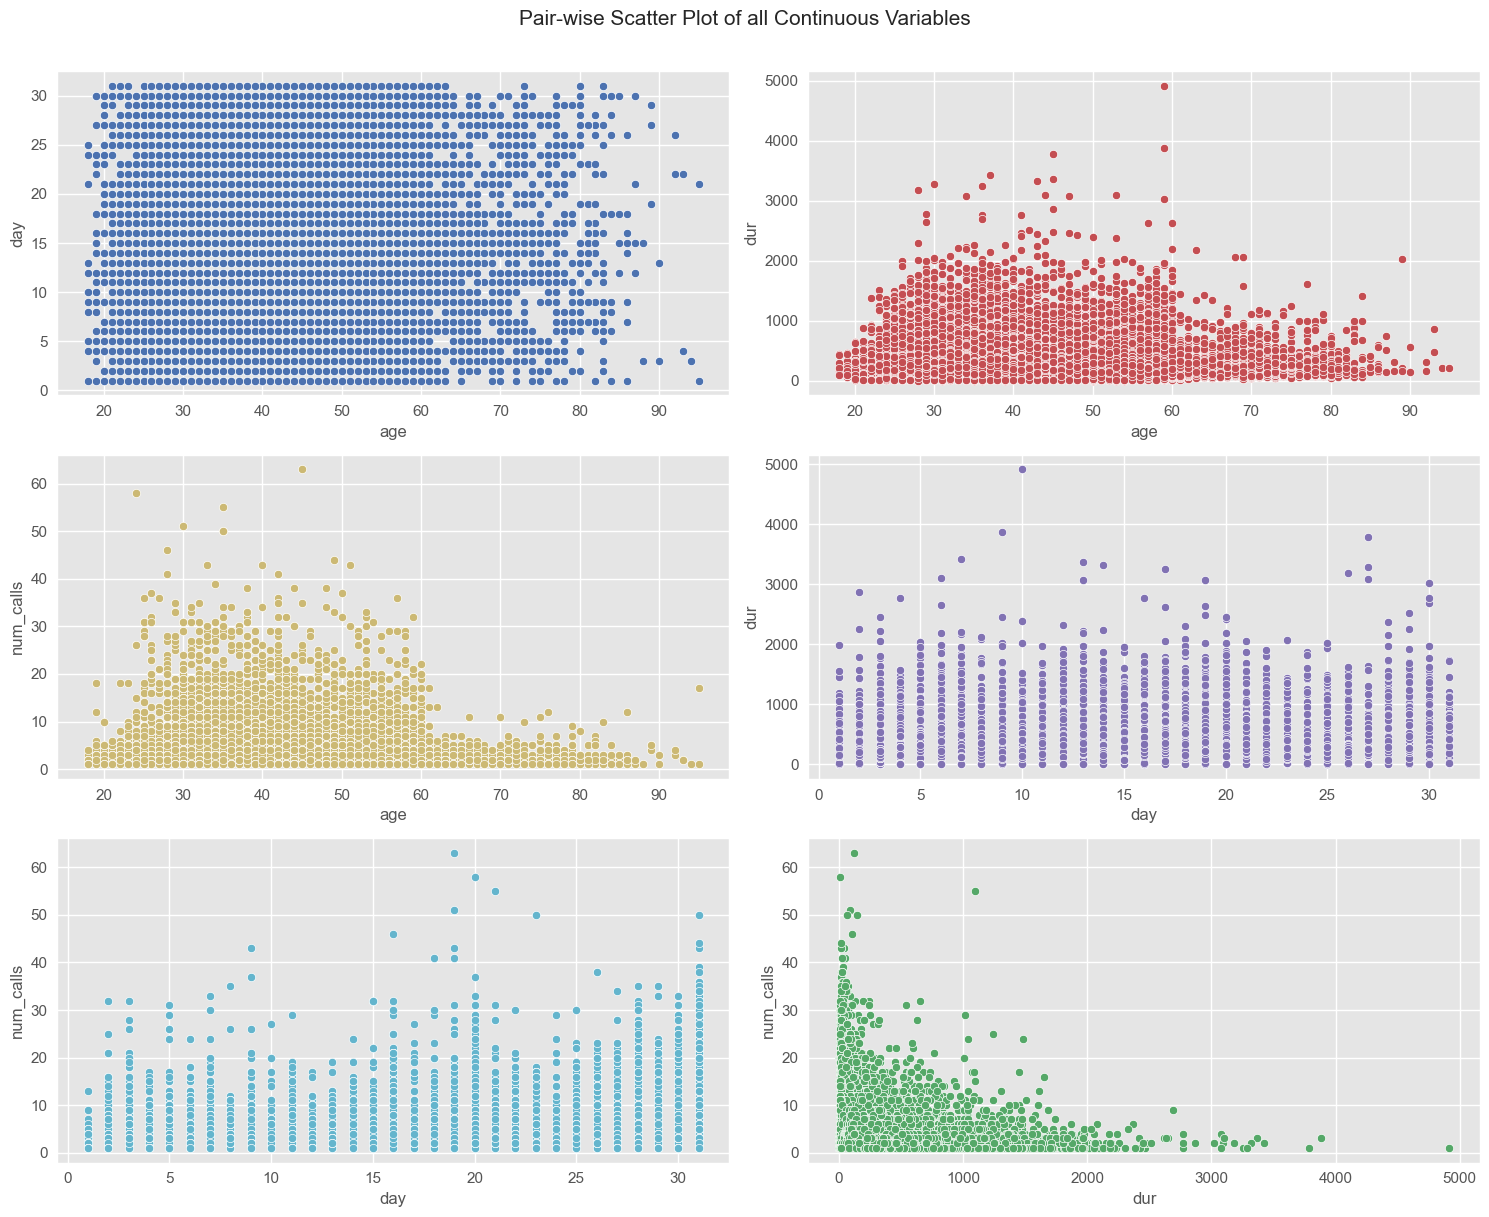

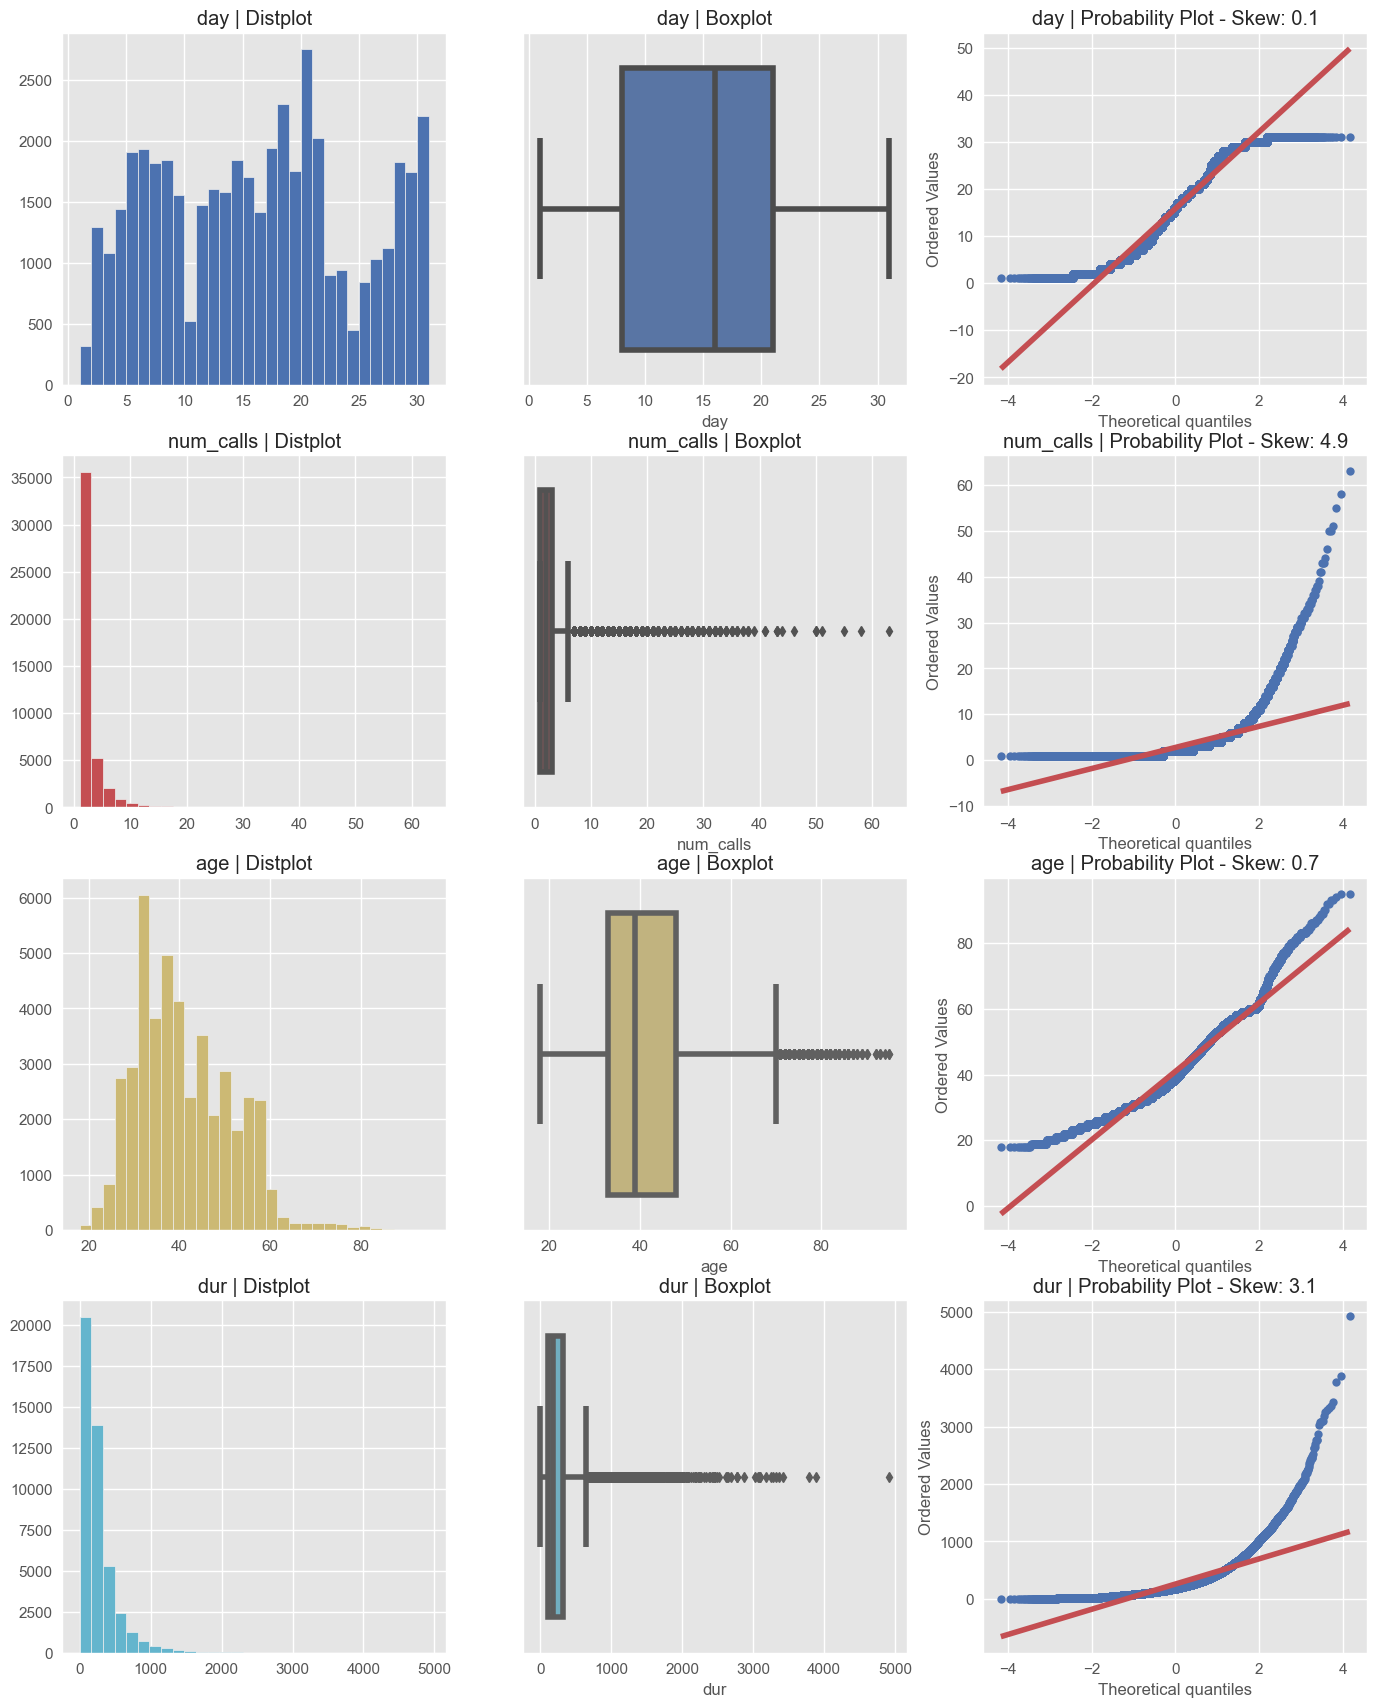

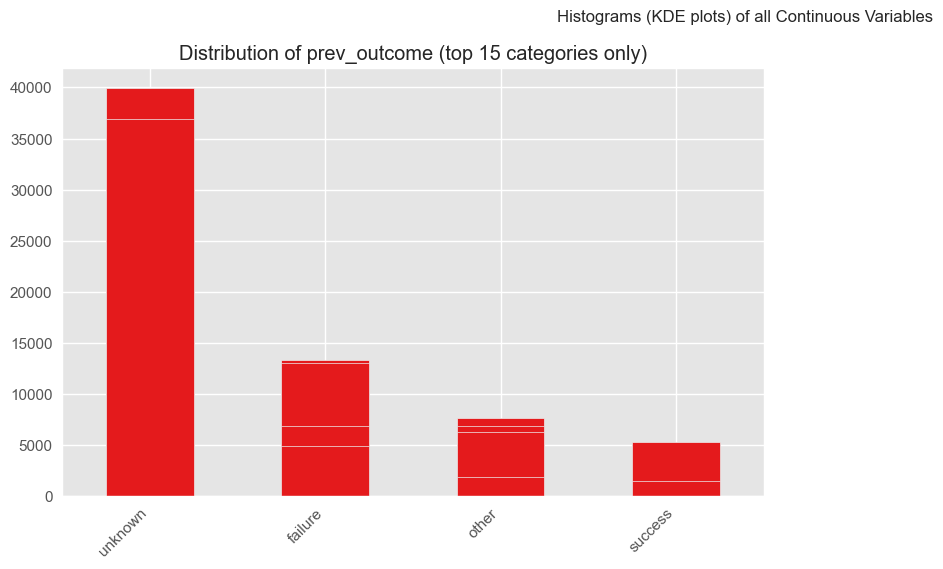

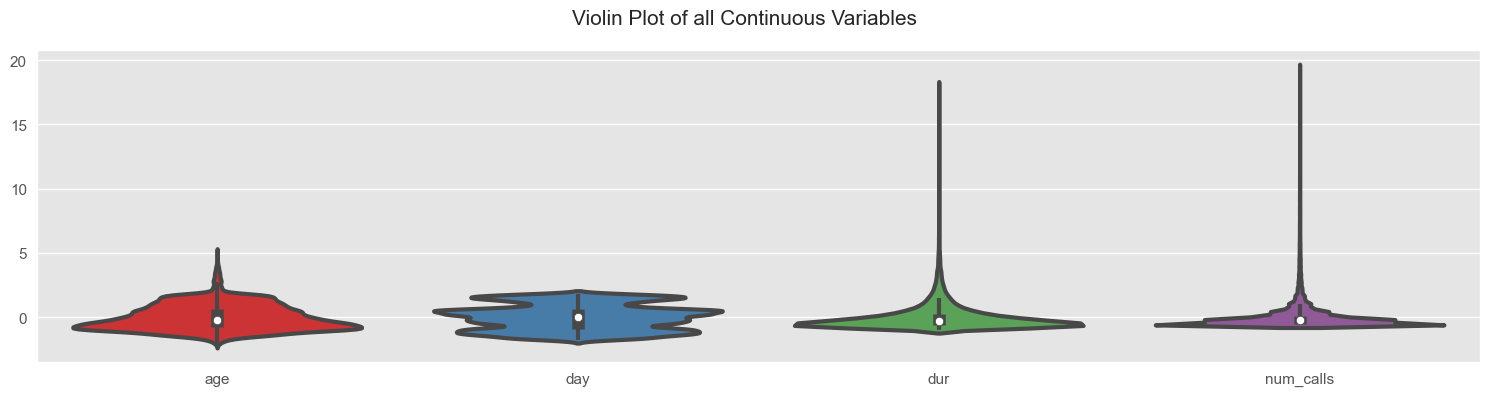

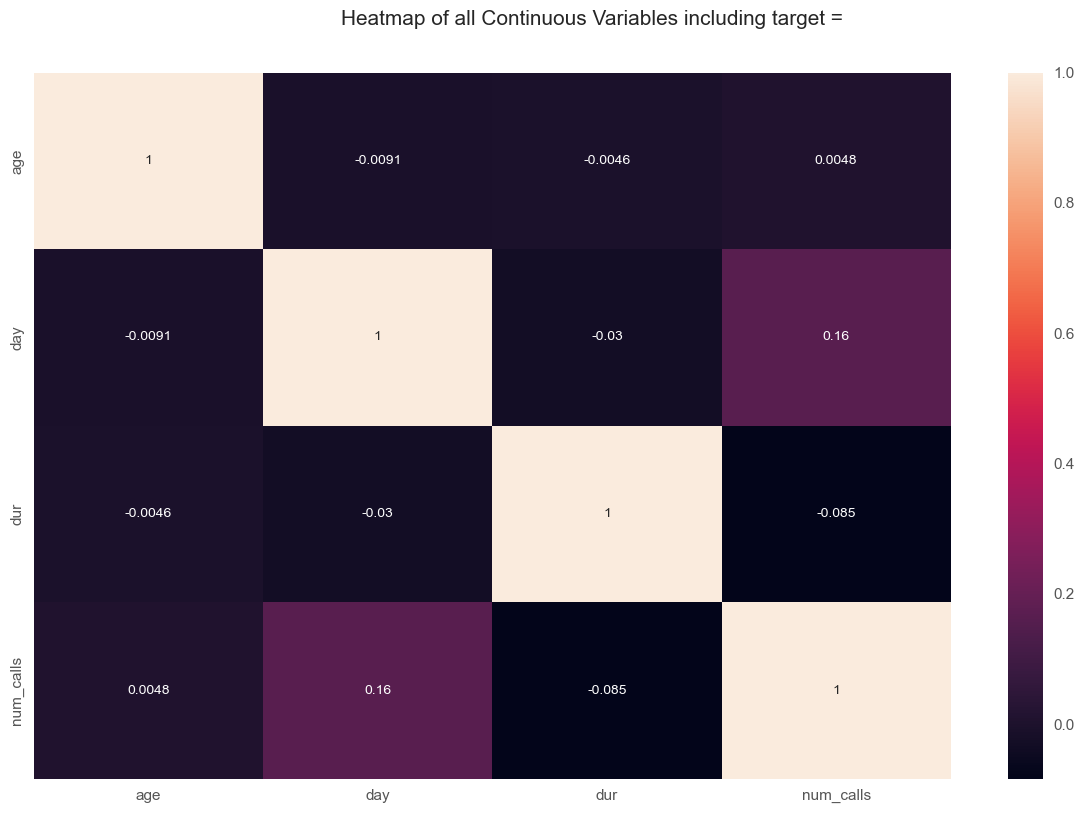

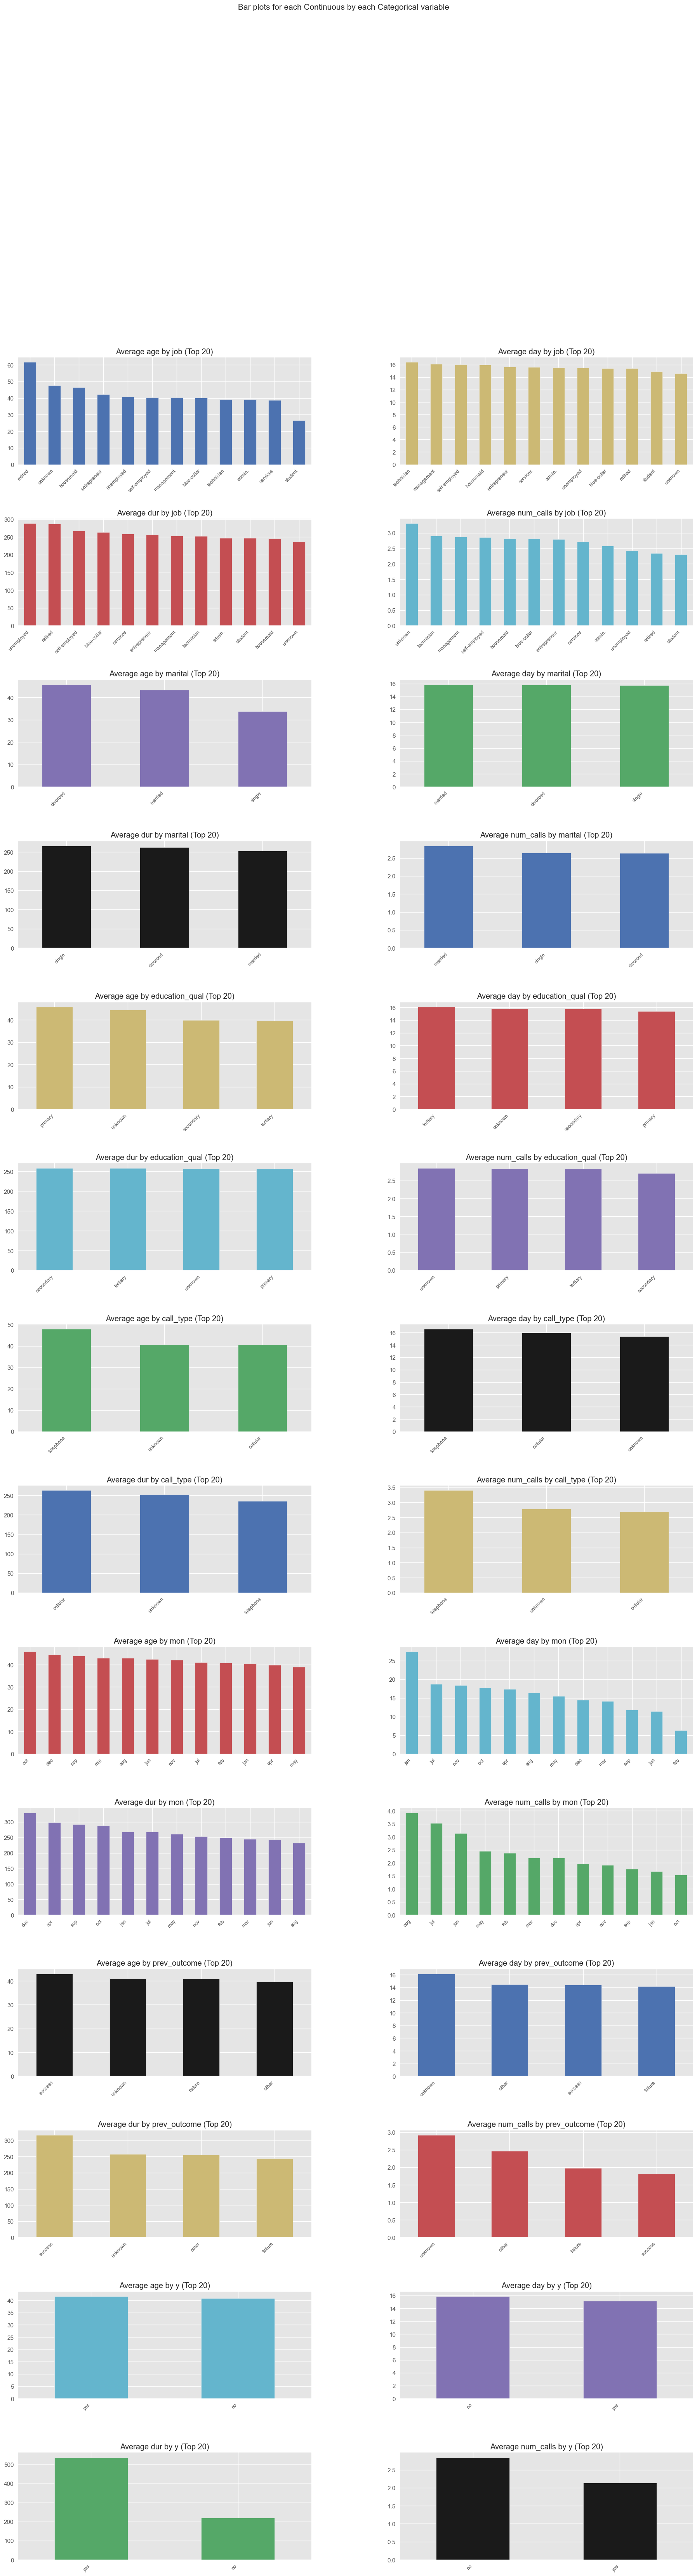

All Plots done
Time to run AutoViz = 6 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [110]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

%matplotlib inline 
# Generate visualizations
AV.AutoViz("train.csv")

## **Encoding required columns**

In [30]:
for i in categorical_columns:
    print(i, ":", df[i].unique())

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
marital : ['married' 'single' 'divorced']
education_qual : ['tertiary' 'secondary' 'primary']
call_type : ['unknown' 'cellular' 'telephone']
mon : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
prev_outcome : ['unknown' 'failure' 'other' 'success']


Creating function for nominal columns(One hot encoding)

In [31]:
def encode_nominal(df,column):
    for i in column:
        dummies = pd.get_dummies(data=df[i],prefix=i)
        df = pd.concat([df,dummies],axis=1)
        df.drop([i],axis=1,inplace=True)
    return df

In [32]:
df.head(2)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0


In [33]:
nominal_column = ['job', 'marital','mon','call_type', 'prev_outcome']
df = encode_nominal(df,nominal_column)

Encoding ordinal column

In [35]:
df.replace({'education_qual':{'primary':1,'secondary':2,'tertiary':3,}},inplace=True)

In [36]:
df

,age,education_qual,day,dur,num_calls,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,mon_nov,mon_oct,mon_sep,call_type_cellular,call_type_telephone,call_type_unknown,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,3,5,261,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,44,2,5,151,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,33,2,5,76,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,47,2,5,92,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,33,2,5,198,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,17,643,3,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
45207,70,1,17,456,2,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
45208,70,2,17,643,5,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
45209,57,2,17,508,4,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1


## Creating Machine learning models

Spliting dataset

In [37]:
X = df.drop(['y'], axis=1)
y = df['y']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

#### Balancing the target variable using SMOTEENN

In [39]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(sampling_strategy=0.75, random_state=101)
X_train_enn, y_train_enn = smote_enn.fit_resample(X_train, y_train)

y_train_enn.value_counts()

0    17917
1    17897
Name: y, dtype: int64

Now target variable is balanced and the important point is we should not over or undersample all the data.Only training data should be balanced

#### scaling the dataset

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enn)
X_test_scaled = scaler.transform(X_test)

We should train the scaling on only training data set because it will lead to data leakage if we do it in test data

**Function to report models**

In [59]:
def report_model(model):
    y_pred = model.predict(X_test_scaled)
    print(classification_report(y_test,y_pred))
    print ("The accuracy of is : ", accuracy_score(y_test, y_pred)*100, "%")
    print ("The aurroc_auc_score of is : ", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))
    cm= confusion_matrix(y_test,y_pred)
    cm_plot_lg = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    cm_plot_lg.plot()
    plt.show()
        

### Logistic regression

In this logistic regression model we are using saga solver

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model_lg = LogisticRegression(solver='saga',max_iter=5000,random_state=101)

#### Hyper parameter tuning

In [48]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [49]:
grid_model_lg = GridSearchCV(model_lg,param_grid={'C':C,'penalty':penalty})
#grid_model_lg.fit(X_train_scaled,y_train_enn)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, random_state=101,
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [60]:
import pickle

In [51]:
#pickle.dump(grid_model_lg, open('grid_model_lg.pkl', 'wb'))

In [61]:
pickled_lg = pickle.load(open('grid_model_lg.pkl', 'rb'))

In [62]:
pickled_lg.best_params_

{'C': 2.7825594022071245, 'penalty': 'l1'}

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     13152
           1       0.49      0.66      0.56      1766

    accuracy                           0.88     14918
   macro avg       0.72      0.78      0.74     14918
weighted avg       0.90      0.88      0.89     14918

The accuracy of Logistic_regression is :  87.8066764981901 %
The aurroc_auc_score of Logistic_regression is :  0.8993051967689226


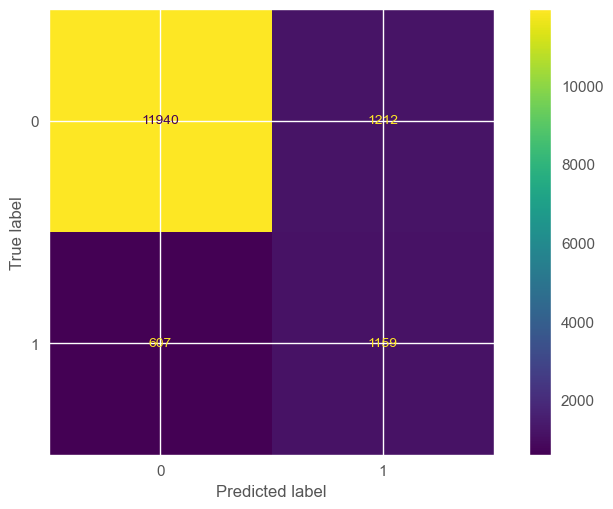

In [63]:
report_model(grid_model_lg)

### **Random forest**


In [64]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)


Model without hyperparameter tuning

In [111]:
model_rf.fit(X_train_scaled,y_train_enn)

RandomForestClassifier(max_features='auto', n_estimators=10, random_state=101)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     13152
           1       0.49      0.64      0.56      1766

    accuracy                           0.88     14918
   macro avg       0.72      0.78      0.75     14918
weighted avg       0.90      0.88      0.89     14918

The accuracy of Logistic_regression is :  88.00107252982974 %
The aurroc_auc_score of Logistic_regression is :  0.8954021220306245


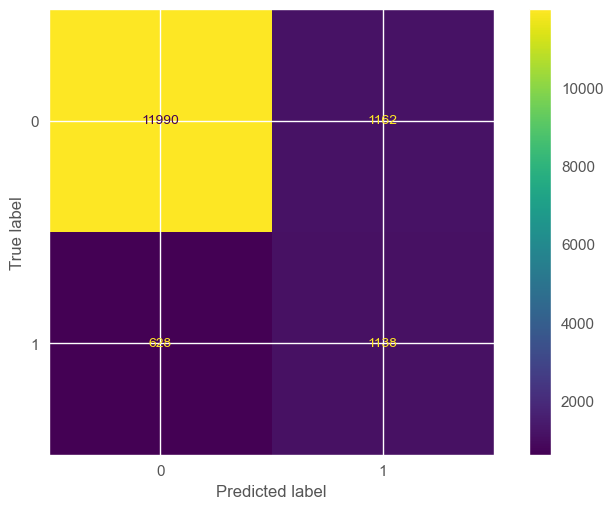

In [112]:
report_model(model_rf)

### **Hyper parameter tuning**

In [ ]:
n_estimators=[64,100,128,150]
max_features= [2,3,4,8]
bootstrap = [True,False]
oob_score = [True,False]

In [ ]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [ ]:
grid_model_rf = GridSearchCV(model_rf,param_grid)
#grid_model_rf.fit(X_train_scaled,y_train_enn)

GridSearchCV(estimator=RandomForestClassifier(max_features='auto',
                                              n_estimators=10,
                                              random_state=101),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 8],
                         'n_estimators': [64, 100, 128, 150],
                         'oob_score': [True, False]})

pickling model

In [ ]:
#pickle.dump(grid_model_rf, open('grid_model_rf.pkl', 'wb'))

Loading model

In [65]:
pickled_rf = pickle.load(open('grid_model_rf.pkl', 'rb'))

Best parameters of model

In [67]:
pickled_rf.best_params_

{'bootstrap': True, 'max_features': 8, 'n_estimators': 150, 'oob_score': True}

Report of model

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     13152
           1       0.50      0.72      0.59      1766

    accuracy                           0.88     14918
   macro avg       0.73      0.81      0.76     14918
weighted avg       0.91      0.88      0.89     14918

The accuracy of Logistic_regression is :  88.20887518434107 %
The aurroc_auc_score of Logistic_regression is :  0.9184569330321593


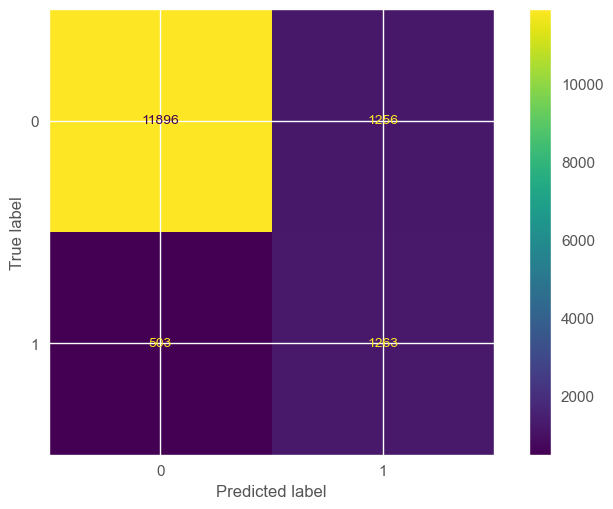

In [66]:
report_model(pickled_rf)

#### **XG-Boost**

In [68]:
from xgboost import XGBClassifier

model_xg = XGBClassifier(objective='binary:logitraw',random_state=101,tree_method="gpu_hist")

#### **Hyper parameter tuning**

In [116]:
param_grid = { 'max_depth': [3,5,7,10],
           'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1],
           'n_estimators': [100, 64, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

In [117]:
grid_model_xgb = GridSearchCV(model_xg,param_grid)
#grid_model_xgb.fit(X_train_scaled,y_train_enn)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logitraw',
                                     predictor=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.07, 0.08, 0.09, 0.1, 0.11, 0.12,
                                           0.13, 0.14, 0.15, 0.2, 0.5, 0.7, 1],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 64, 500, 1000]})

pickling model

In [ ]:
#pickle.dump(grid_model_xgb, open('grid_model_xgb.pkl', 'wb'))

loading model

In [69]:
pickled_xgb = pickle.load(open('grid_model_xgb.pkl', 'rb'))

best parameters of model

In [70]:
pickled_xgb.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 10,
 'n_estimators': 500,
 'tree_method': 'gpu_hist'}

Report of model

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     13152
           1       0.54      0.69      0.61      1766

    accuracy                           0.89     14918
   macro avg       0.75      0.80      0.77     14918
weighted avg       0.91      0.89      0.90     14918

The accuracy of Logistic_regression is :  89.40206461992224 %
The aurroc_auc_score of Logistic_regression is :  0.9239989809885565


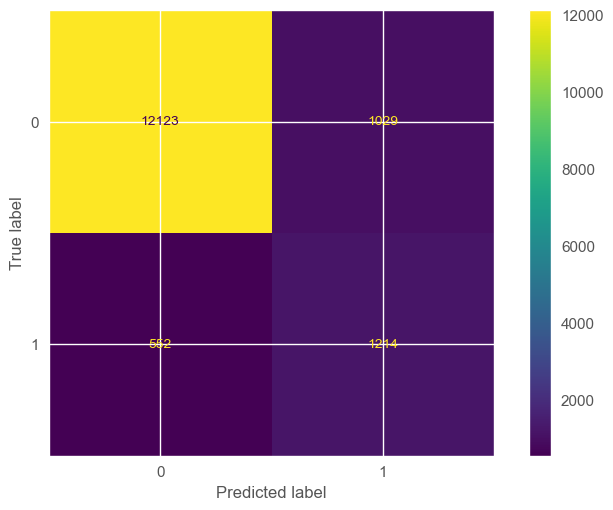

In [71]:
report_model(pickled_xgb)

# **Final model**

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     13152
           1       0.54      0.69      0.60      1766

    accuracy                           0.89     14918
   macro avg       0.75      0.80      0.77     14918
weighted avg       0.91      0.89      0.90     14918

The accuracy of Logistic_regression is :  89.36854806274299 %
The aurroc_auc_score of Logistic_regression is :  0.9241213846362628


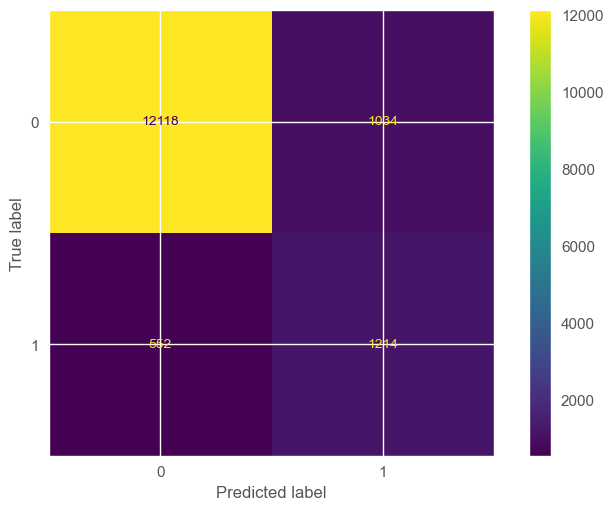

In [115]:
model_xg = XGBClassifier(learning_rate=0.01, n_estimators=500,colsample_bytree=0.7,objective='binary:logitraw',max_depth=10,random_state=101)
model_xg.fit(X_train_scaled,y_train_enn)
report_model(model_xg)

In [113]:
lg_y_pred_prob = pickled_lg.predict_proba(X_test_scaled)[:, 1]
lg_auc = roc_auc_score(y_test, lg_y_pred_prob)

rf_y_pred_prob = pickled_rf.predict_proba(X_test_scaled)[:, 1]
rf_auc = roc_auc_score(y_test, rf_y_pred_prob)

xgb_y_pred_prob = model_xg.predict_proba(X_test_scaled)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_y_pred_prob)

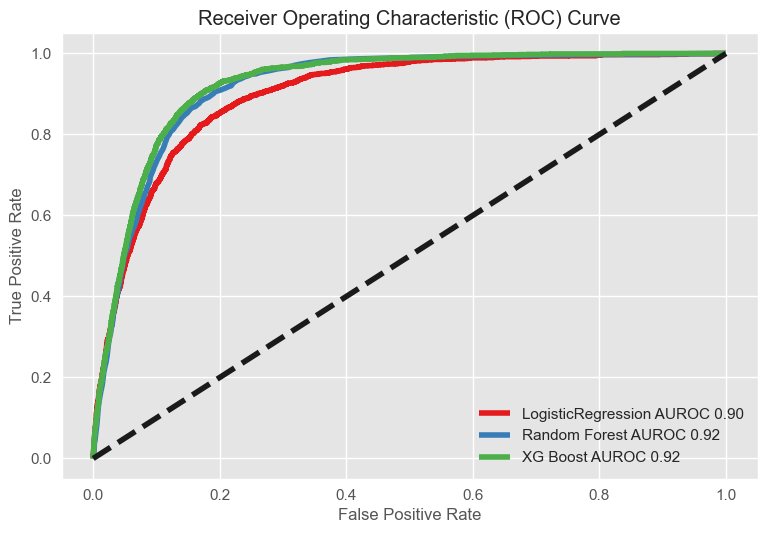

In [114]:
from sklearn.metrics import roc_curve
log_reg_fpr, log_reg_tpr,A =  roc_curve(y_test, lg_y_pred_prob)
rf_fpr, rf_tpr,A = roc_curve(y_test, rf_y_pred_prob)
xgb_fpr, xgb_tpr,A = roc_curve(y_test, xgb_y_pred_prob)

plt.plot(log_reg_fpr,log_reg_tpr,label=f'LogisticRegression AUROC {lg_auc:.2f}')
plt.plot(rf_fpr,rf_tpr,label=f'Random Forest AUROC {rf_auc:.2f}')
plt.plot(xgb_fpr,xgb_tpr,label=f'XG Boost AUROC {xgb_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Among the three models of classification XG_boost performs best and you can see this in the roc plot

### **Feature importance**

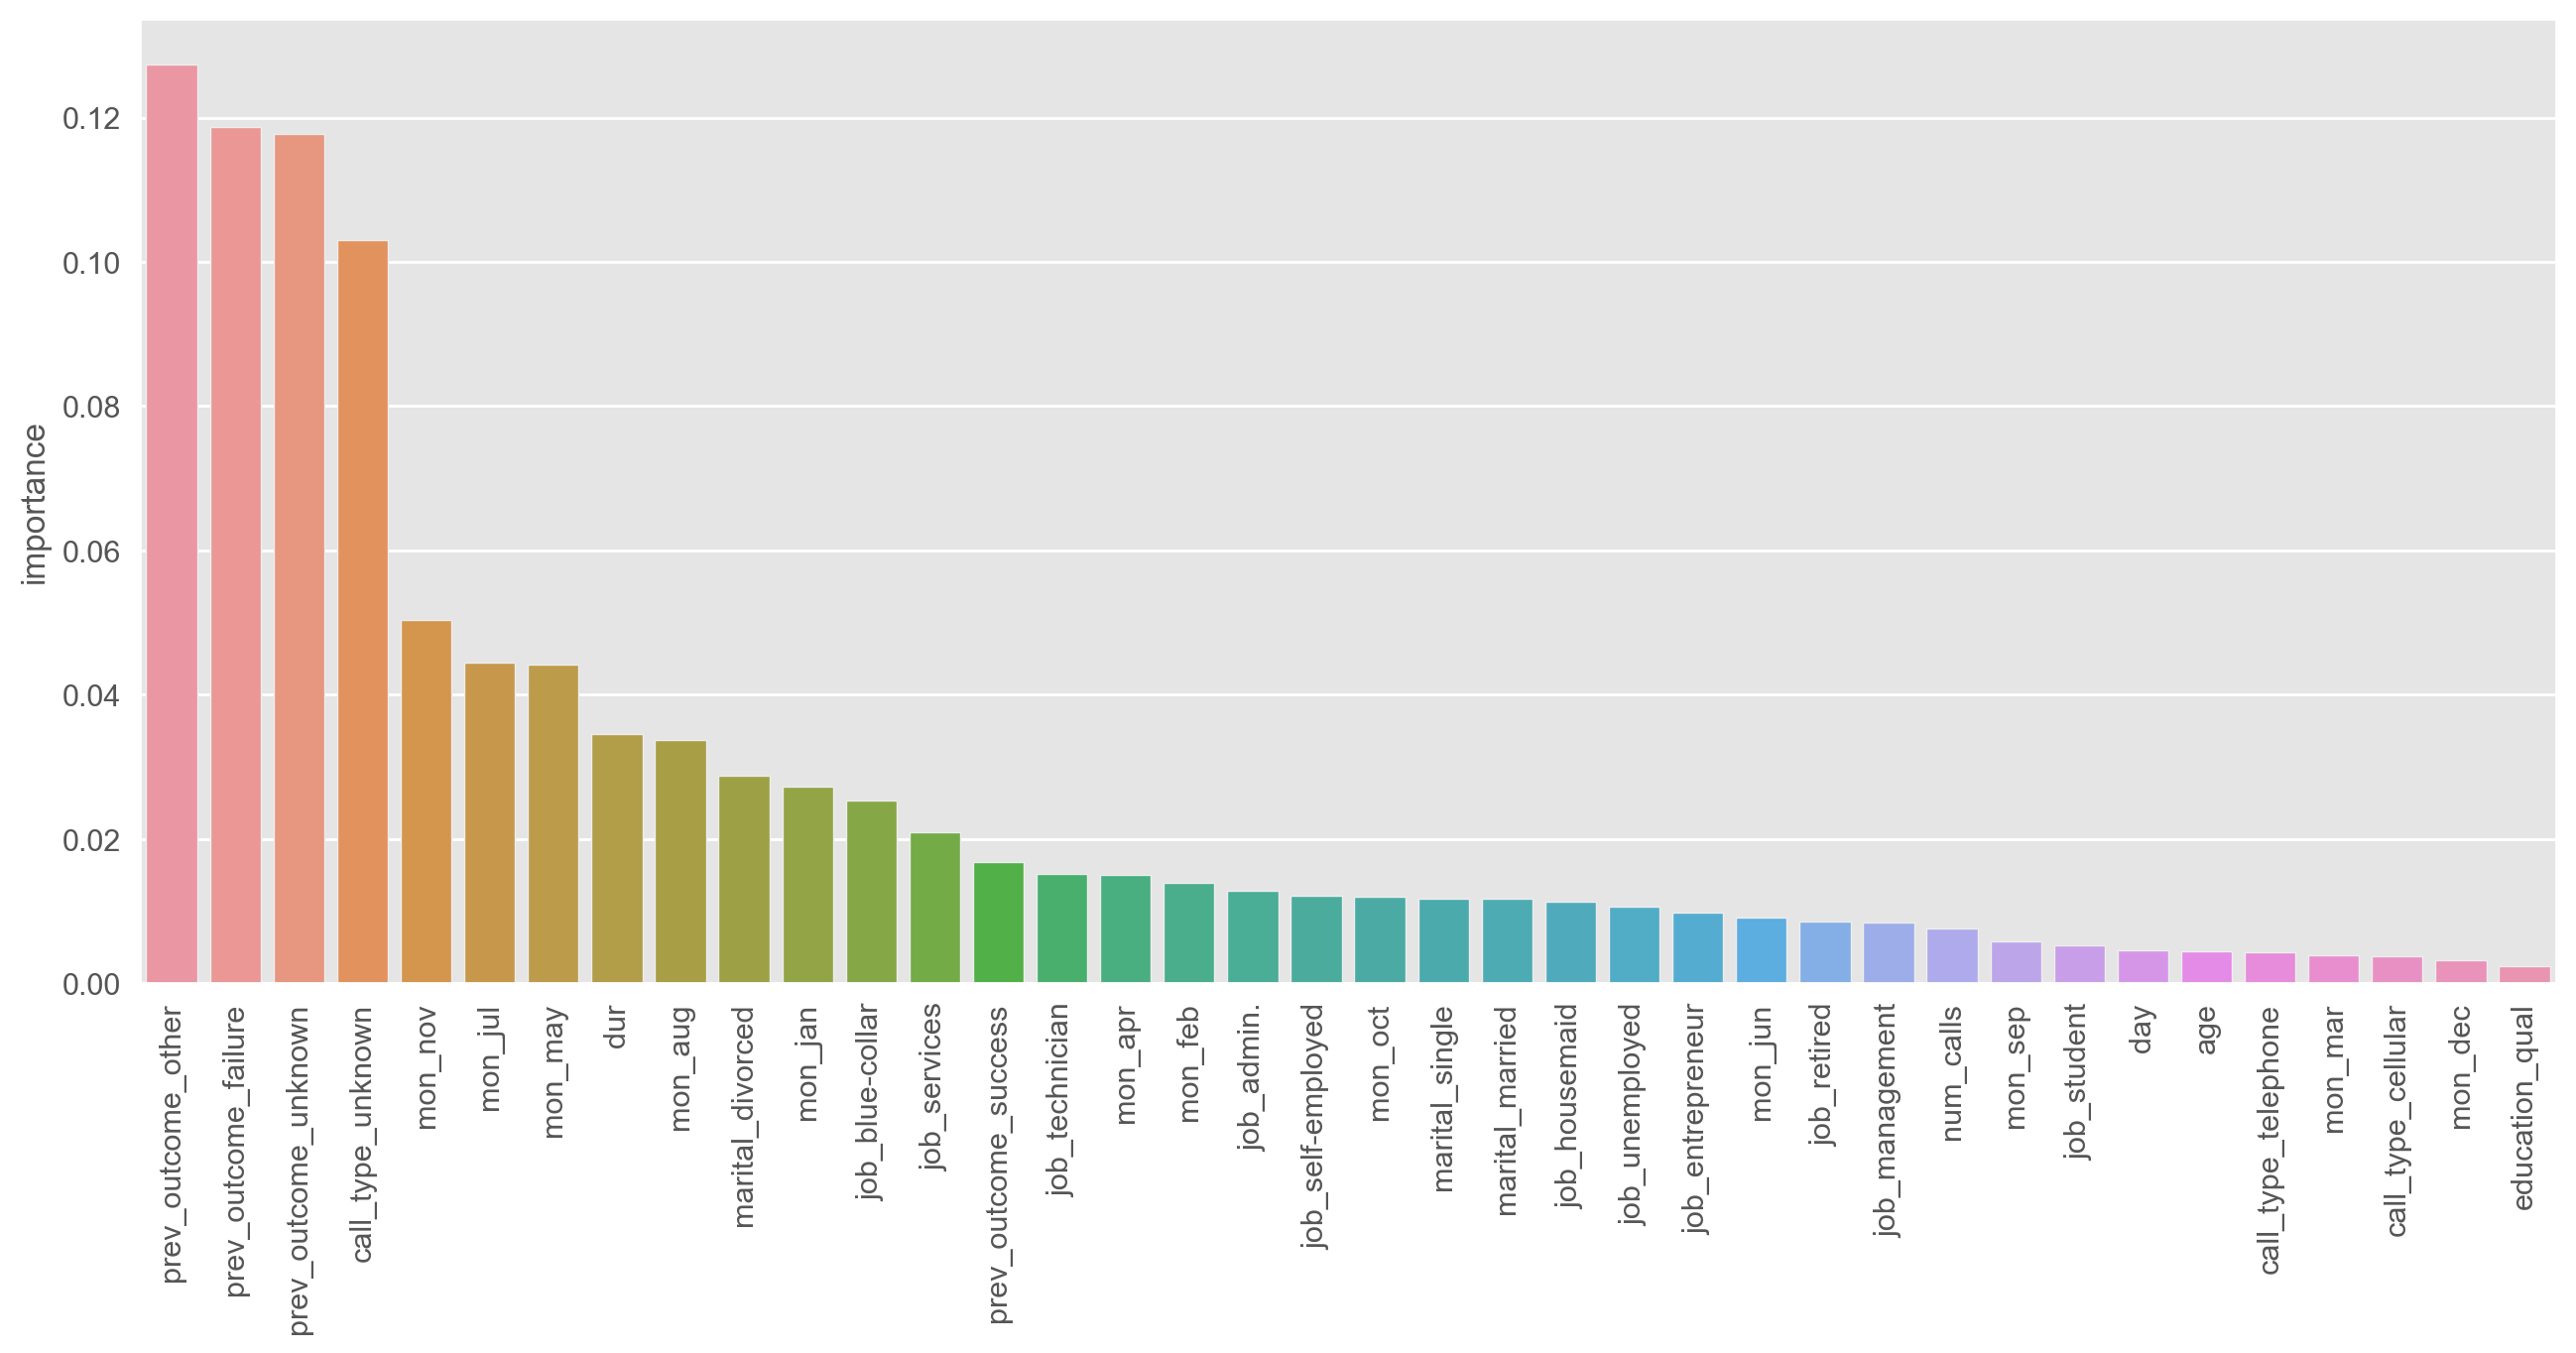

In [ ]:
feat_xg = pd.DataFrame(data=model_xg.feature_importances_, index=X.columns, columns=["importance"]).sort_values(by='importance',ascending=False)
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=feat_xg,x=feat_xg.index,y='importance')

plt.xticks(rotation=90);

In [ ]:
# feat_rf = pd.DataFrame(data=model_rf.feature_importances_, index=X.columns, columns=["importance"]).sort_values(by='importance',ascending=False)
# plt.figure(figsize=(14,6),dpi=200)
# sns.barplot(data=feat_rf,x=feat_rf.index,y='importance')

# plt.xticks(rotation=90);

# Conclusion

XG_boost outperformed all the other models with the highest AUROC score of 0.9241
<br/>
This implies that XG-boost is suitable to predict whether the client will subcribe to the insurance or not.